In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

from scipy import stats

seed = 42
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [253]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [255]:
xx=pd.DataFrame(df.isnull().sum(),columns=["No of nan values"])
xx

,No of nan values
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [256]:
df[df["Alcohol"].isnull()]["Year"].value_counts()

2015    177
2005      2
2013      2
2014      1
2012      1
2011      1
2010      1
2009      1
2008      1
2007      1
2006      1
2004      1
2003      1
2002      1
2001      1
2000      1
Name: Year, dtype: int64

In [257]:
df.columns = [x.strip() for x in df.columns]


In [258]:
print(df["Life expectancy"].mean())
print(df["Life expectancy"].median())

69.22493169398908
72.1


In [259]:
df[df["Life expectancy"].isnull()][["Year","Country"]]
#looks like most missing values were found in 2013

,Year,Country
624,2013,Cook Islands
769,2013,Dominica
1650,2013,Marshall Islands
1715,2013,Monaco
1812,2013,Nauru
1909,2013,Niue
1958,2013,Palau
2167,2013,Saint Kitts and Nevis
2216,2013,San Marino
2713,2013,Tuvalu


In [260]:
df[df["Adult Mortality"].isnull()][["Year","Country"]]
#same with Adult mortality

,Year,Country
624,2013,Cook Islands
769,2013,Dominica
1650,2013,Marshall Islands
1715,2013,Monaco
1812,2013,Nauru
1909,2013,Niue
1958,2013,Palau
2167,2013,Saint Kitts and Nevis
2216,2013,San Marino
2713,2013,Tuvalu


In [261]:
life_expentancy_in_2013=df.groupby("Year")["Life expectancy"].agg("mean")[2013]
df['Life expectancy'] = df['Life expectancy'].fillna(life_expentancy_in_2013)
Adult_Mortality_in_2013=df.groupby("Year")["Adult Mortality"].agg("mean")[2013]
df['Adult Mortality'] = df['Adult Mortality'].fillna(Adult_Mortality_in_2013)
Alcohol_in_2015=df.groupby("Year")["Alcohol"].agg("median")[2015]
df['Alcohol'] = df['Alcohol'].fillna(Alcohol_in_2015)
Total_expenditure_in_2015=df.groupby("Year")["Total expenditure"].agg("mean")[2015]
df['Total expenditure'] = df['Total expenditure'].fillna(Total_expenditure_in_2015)

In [262]:
df[df["Alcohol"].isnull()]["Year"].value_counts()
#let's replace it with the median alcohol value to prevent any statistical errors

Series([], Name: Year, dtype: int64)

In [263]:
df.fillna(df.median(),inplace=True)

In [264]:
pd.DataFrame(df.isnull().sum(),columns=["No of nan values"])

,No of nan values
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


# Visulaizations

In [265]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


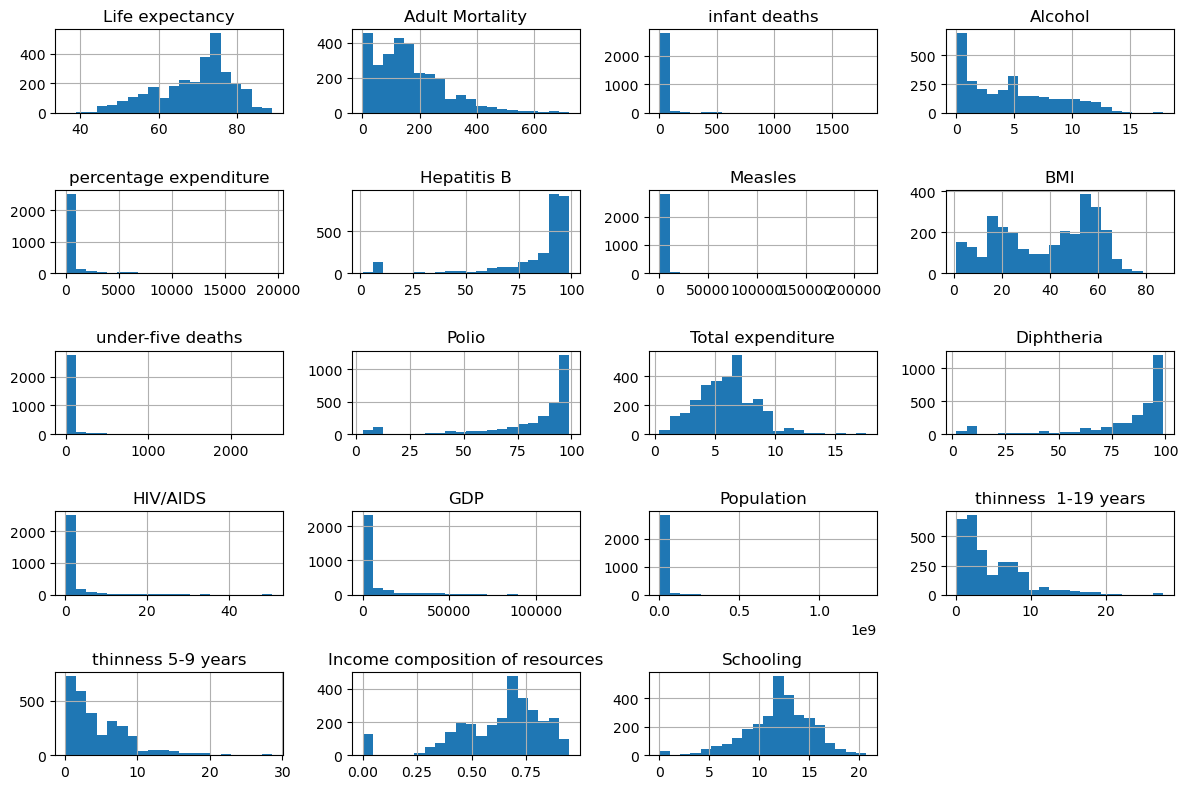

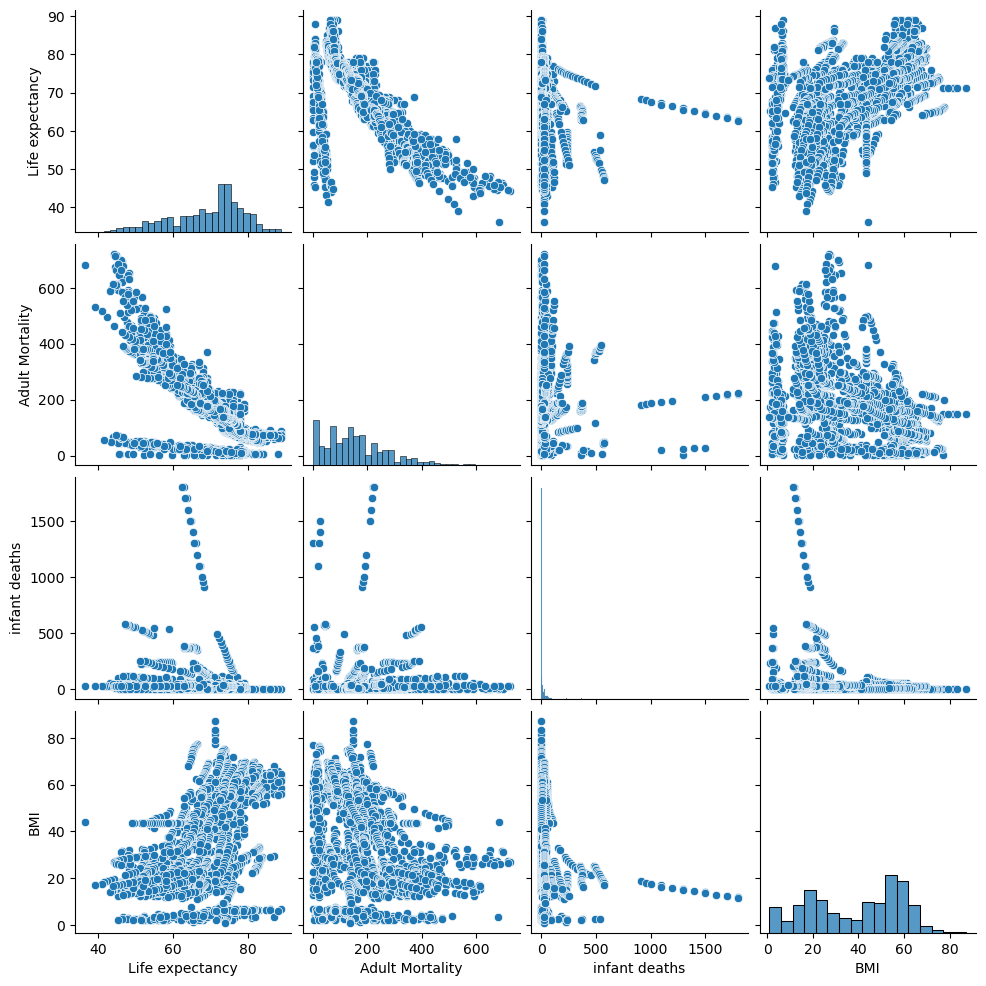

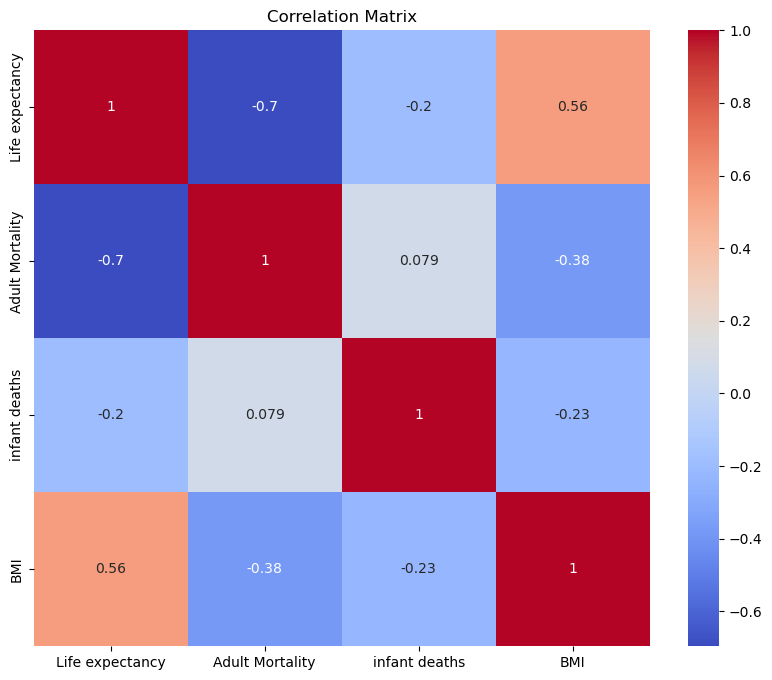

In [266]:
numerical_cols = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'BMI']
numerical_cols2= df.columns[3:]

# Remove leading/trailing spaces from column names

# Plot histograms of numerical variables
df[numerical_cols2].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot scatter matrix to visualize relationships between numerical variables
sns.pairplot(df[numerical_cols])
plt.show()

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
linear=LinearRegression()
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import HuberRegressor
standard=MinMaxScaler()
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
bayesian_ridge = BayesianRidge()
ard_regression = ARDRegression()
lars = Lars()
rann=RANSACRegressor()
huber=HuberRegressor()
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5) 
passive_aggressive_regressor = PassiveAggressiveRegressor(C=1.0, max_iter=1000, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=0)
ran=RandomForestRegressor(n_estimators=20)
bag=BaggingRegressor()
gradient=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
hist=HistGradientBoostingRegressor(learning_rate=0.1,l2_regularization=0.1)
ada=AdaBoostRegressor(n_estimators=10,learning_rate=0.2,random_state=40)
knn=KNeighborsRegressor(n_neighbors=10)
el=ElasticNet(alpha=0.1)
Quantile=QuantileRegressor()
svm=SVR()

In [268]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [269]:
df.columns[:3]

Index(['Country', 'Year', 'Status'], dtype='object')

In [270]:

num_col=['Country', 'Status']
pd.get_dummies(df,num_col,drop_first=True)

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for cols in num_col:
    df[cols]=label.fit_transform(df[cols])

x=df.drop("Life expectancy",axis=1)
y=df["Life expectancy"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=50)


x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [271]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=model.score(x_test,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')
print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')
print(f' For SVR Algorithm, we had an accuracy of {get_score(svm)}')
print(f' For HuberRegressor Algorithm, we had an accuracy of {get_score(huber)}')
print(f' For RANSACRegressor Algorithm, we had an accuracy of {get_score(rann)}')
print(f' For QuantileRegressor Algorithm, we had an accuracy of {get_score(Quantile)}')

These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 80.88948013650904
 For  Ridge Algorithm, we had an accuracy of 79.61448621309735
 For Lasso Regression Algorithm, we had an accuracy of 78.15247951707497
 For Bayesian Algorithm, we had an accuracy of 79.77258178071716
 For ARDRegression Algorithm, we had an accuracy of 79.844593246031
 For Lars Algorithm, we had an accuracy of 80.67311618584576
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 72.30092280176528
 For Passive Aggression Regressor Algorithm, we had an accuracy of 74.20291580853076
 For Decision TreeRegressor Algorithm, we had an accuracy of 88.76323026532799
 For Random Forest Regressor Algorithm, we had an accuracy of 93.6405621041082
 For Gradient Boost Regressor Algorithm, we had an accuracy of 76.12256829895156
 For Hist Regressor Algorithm, we had an accuracy of 94.23617527957262
 For Adaboost Forest Regressor Algorithm, we had an accuracy o

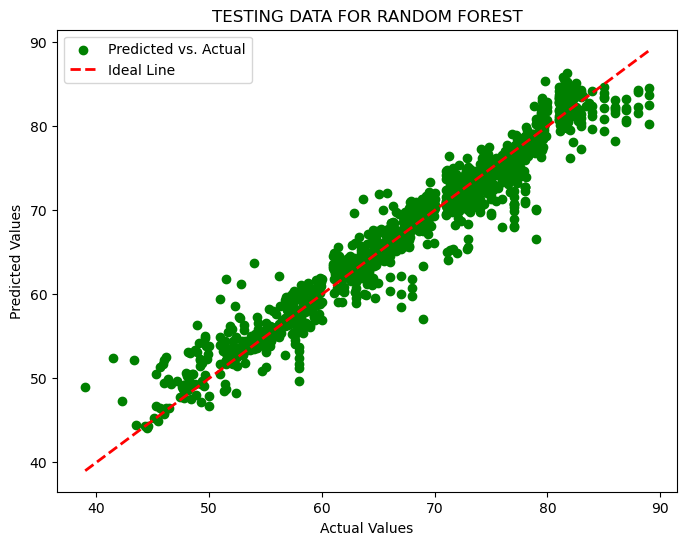

In [272]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)
pred=hist.predict(x_test_new)
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='g', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR RANDOM FOREST")
plt.legend()


In [273]:

# Define a list of base estimators
base_estimators = [
    ('Linear Regression', linear),
    ('Ridge', ridge_model),
    ('Lasso Regression', lasso_model),
    ('Bayesian Ridge', bayesian_ridge),
    ('ARD Regression', ard_regression),
    ('Lars', lars),
    ('Orthogonal Matching Pursuit', omp),
    ('Passive Aggression Regressor', passive_aggressive_regressor),
    ('Decision Tree Regressor', dt_regressor),
    ('Random Forest Regressor', ran),
    ('Gradient Boosting Regressor', gradient),
    ('Hist Gradient Boosting Regressor', hist),
    ('Adaboost Forest Regressor', ada),
    ('KNN Regressor', knn),
    ('Elastic Net', el),
    ('Bagging Regressor', bag)
]

def get_r2_score(base_estimator):
    stacking_model = StackingRegressor(estimators=[base_estimator], final_estimator=linear)
    stacking_model.fit(x_train, y_train)
    y_pred_stacked = stacking_model.predict(x_test)
    r2_stacked = r2_score(y_test, y_pred_stacked)

    return r2_stacked

print("These are the R2 scores for the Testing data\n")
for name, model in base_estimators:
    r2 = get_r2_score((name, model))
    print(f'For {name}, R2 Score: {r2*100:.2f}')

These are the R2 scores for the Testing data

For Linear Regression, R2 Score: 81.42
For Ridge, R2 Score: 80.33
For Lasso Regression, R2 Score: 79.24
For Bayesian Ridge, R2 Score: 80.42
For ARD Regression, R2 Score: 80.27
For Lars, R2 Score: 81.42
For Orthogonal Matching Pursuit, R2 Score: 72.75
For Passive Aggression Regressor, R2 Score: 74.36
For Decision Tree Regressor, R2 Score: 90.24
For Random Forest Regressor, R2 Score: 94.84
For Gradient Boosting Regressor, R2 Score: 88.72
For Hist Gradient Boosting Regressor, R2 Score: 95.63
For Adaboost Forest Regressor, R2 Score: 85.64
For KNN Regressor, R2 Score: 84.68
For Elastic Net, R2 Score: 73.57
For Bagging Regressor, R2 Score: 94.10


In [275]:

from catboost import CatBoostRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=standard.fit_transform(x_train) 
x_test=standard.transform(x_test)
model = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                         learning_rate=0.1,  # Step size shrinking to prevent overfitting
                         depth=9,  # Depth of the decision tree
                         loss_function='RMSE')  # Regression loss function

model.fit(x_train, y_train)

0:	learn: 8.8498719	total: 23.6ms	remaining: 23.6s
1:	learn: 8.1737858	total: 45ms	remaining: 22.5s
2:	learn: 7.5828077	total: 63.3ms	remaining: 21s
3:	learn: 7.0499864	total: 81.8ms	remaining: 20.4s
4:	learn: 6.6039065	total: 102ms	remaining: 20.3s
5:	learn: 6.1304916	total: 122ms	remaining: 20.2s
6:	learn: 5.7417981	total: 142ms	remaining: 20.2s
7:	learn: 5.3732319	total: 165ms	remaining: 20.4s
8:	learn: 5.0553311	total: 192ms	remaining: 21.2s
9:	learn: 4.7631516	total: 203ms	remaining: 20.1s
10:	learn: 4.4777065	total: 223ms	remaining: 20s
11:	learn: 4.2277637	total: 243ms	remaining: 20s
12:	learn: 4.0362777	total: 263ms	remaining: 20s
13:	learn: 3.8504553	total: 287ms	remaining: 20.2s
14:	learn: 3.6877221	total: 307ms	remaining: 20.1s
15:	learn: 3.5359358	total: 327ms	remaining: 20.1s
16:	learn: 3.3980553	total: 350ms	remaining: 20.2s
17:	learn: 3.2682600	total: 374ms	remaining: 20.4s
18:	learn: 3.1631943	total: 394ms	remaining: 20.3s
19:	learn: 3.0545183	total: 411ms	remaining: 20

165:	learn: 1.0002678	total: 3.28s	remaining: 16.5s
166:	learn: 0.9939674	total: 3.3s	remaining: 16.5s
167:	learn: 0.9870454	total: 3.32s	remaining: 16.5s
168:	learn: 0.9823088	total: 3.34s	remaining: 16.4s
169:	learn: 0.9784373	total: 3.36s	remaining: 16.4s
170:	learn: 0.9712098	total: 3.38s	remaining: 16.4s
171:	learn: 0.9683842	total: 3.4s	remaining: 16.4s
172:	learn: 0.9638125	total: 3.42s	remaining: 16.4s
173:	learn: 0.9603739	total: 3.44s	remaining: 16.3s
174:	learn: 0.9588549	total: 3.46s	remaining: 16.3s
175:	learn: 0.9552438	total: 3.48s	remaining: 16.3s
176:	learn: 0.9496975	total: 3.49s	remaining: 16.2s
177:	learn: 0.9460651	total: 3.51s	remaining: 16.2s
178:	learn: 0.9411149	total: 3.53s	remaining: 16.2s
179:	learn: 0.9402406	total: 3.55s	remaining: 16.2s
180:	learn: 0.9392146	total: 3.57s	remaining: 16.1s
181:	learn: 0.9344672	total: 3.58s	remaining: 16.1s
182:	learn: 0.9303772	total: 3.6s	remaining: 16.1s
183:	learn: 0.9283943	total: 3.62s	remaining: 16s
184:	learn: 0.922

329:	learn: 0.5517184	total: 6.47s	remaining: 13.1s
330:	learn: 0.5502899	total: 6.49s	remaining: 13.1s
331:	learn: 0.5473824	total: 6.51s	remaining: 13.1s
332:	learn: 0.5454281	total: 6.53s	remaining: 13.1s
333:	learn: 0.5421074	total: 6.55s	remaining: 13.1s
334:	learn: 0.5394411	total: 6.57s	remaining: 13.1s
335:	learn: 0.5382787	total: 6.59s	remaining: 13s
336:	learn: 0.5347699	total: 6.61s	remaining: 13s
337:	learn: 0.5333580	total: 6.63s	remaining: 13s
338:	learn: 0.5302705	total: 6.64s	remaining: 13s
339:	learn: 0.5296420	total: 6.66s	remaining: 12.9s
340:	learn: 0.5287865	total: 6.68s	remaining: 12.9s
341:	learn: 0.5285268	total: 6.7s	remaining: 12.9s
342:	learn: 0.5268511	total: 6.72s	remaining: 12.9s
343:	learn: 0.5235686	total: 6.74s	remaining: 12.9s
344:	learn: 0.5231327	total: 6.75s	remaining: 12.8s
345:	learn: 0.5212484	total: 6.77s	remaining: 12.8s
346:	learn: 0.5183053	total: 6.8s	remaining: 12.8s
347:	learn: 0.5171552	total: 6.82s	remaining: 12.8s
348:	learn: 0.5153748	

489:	learn: 0.3460477	total: 9.5s	remaining: 9.88s
490:	learn: 0.3450259	total: 9.52s	remaining: 9.87s
491:	learn: 0.3438379	total: 9.54s	remaining: 9.85s
492:	learn: 0.3430749	total: 9.56s	remaining: 9.83s
493:	learn: 0.3421959	total: 9.57s	remaining: 9.81s
494:	learn: 0.3400367	total: 9.59s	remaining: 9.79s
495:	learn: 0.3387188	total: 9.61s	remaining: 9.76s
496:	learn: 0.3381135	total: 9.63s	remaining: 9.74s
497:	learn: 0.3377818	total: 9.64s	remaining: 9.72s
498:	learn: 0.3374877	total: 9.66s	remaining: 9.7s
499:	learn: 0.3358409	total: 9.68s	remaining: 9.68s
500:	learn: 0.3355298	total: 9.7s	remaining: 9.66s
501:	learn: 0.3346473	total: 9.72s	remaining: 9.64s
502:	learn: 0.3337042	total: 9.74s	remaining: 9.63s
503:	learn: 0.3332757	total: 9.76s	remaining: 9.61s
504:	learn: 0.3323771	total: 9.78s	remaining: 9.58s
505:	learn: 0.3314798	total: 9.8s	remaining: 9.56s
506:	learn: 0.3305731	total: 9.81s	remaining: 9.54s
507:	learn: 0.3291174	total: 9.83s	remaining: 9.52s
508:	learn: 0.32

648:	learn: 0.2298060	total: 13.1s	remaining: 7.06s
649:	learn: 0.2290038	total: 13.1s	remaining: 7.05s
650:	learn: 0.2286268	total: 13.1s	remaining: 7.04s
651:	learn: 0.2282098	total: 13.2s	remaining: 7.02s
652:	learn: 0.2278165	total: 13.2s	remaining: 7.01s
653:	learn: 0.2273747	total: 13.2s	remaining: 6.99s
654:	learn: 0.2264050	total: 13.3s	remaining: 6.98s
655:	learn: 0.2255839	total: 13.3s	remaining: 6.96s
656:	learn: 0.2245789	total: 13.3s	remaining: 6.95s
657:	learn: 0.2245702	total: 13.3s	remaining: 6.93s
658:	learn: 0.2242033	total: 13.4s	remaining: 6.92s
659:	learn: 0.2229318	total: 13.4s	remaining: 6.9s
660:	learn: 0.2220031	total: 13.4s	remaining: 6.88s
661:	learn: 0.2206544	total: 13.4s	remaining: 6.86s
662:	learn: 0.2206461	total: 13.5s	remaining: 6.84s
663:	learn: 0.2202574	total: 13.5s	remaining: 6.83s
664:	learn: 0.2195754	total: 13.5s	remaining: 6.81s
665:	learn: 0.2189763	total: 13.5s	remaining: 6.79s
666:	learn: 0.2188984	total: 13.6s	remaining: 6.77s
667:	learn: 0

813:	learn: 0.1548316	total: 17s	remaining: 3.89s
814:	learn: 0.1545063	total: 17s	remaining: 3.87s
815:	learn: 0.1540441	total: 17.1s	remaining: 3.85s
816:	learn: 0.1537060	total: 17.1s	remaining: 3.83s
817:	learn: 0.1534540	total: 17.1s	remaining: 3.81s
818:	learn: 0.1530736	total: 17.1s	remaining: 3.79s
819:	learn: 0.1528898	total: 17.1s	remaining: 3.76s
820:	learn: 0.1527570	total: 17.2s	remaining: 3.74s
821:	learn: 0.1525752	total: 17.2s	remaining: 3.72s
822:	learn: 0.1522547	total: 17.2s	remaining: 3.7s
823:	learn: 0.1519909	total: 17.2s	remaining: 3.68s
824:	learn: 0.1514384	total: 17.3s	remaining: 3.66s
825:	learn: 0.1509926	total: 17.3s	remaining: 3.64s
826:	learn: 0.1507074	total: 17.3s	remaining: 3.62s
827:	learn: 0.1504762	total: 17.3s	remaining: 3.6s
828:	learn: 0.1499676	total: 17.3s	remaining: 3.58s
829:	learn: 0.1496246	total: 17.4s	remaining: 3.56s
830:	learn: 0.1494118	total: 17.4s	remaining: 3.54s
831:	learn: 0.1492649	total: 17.4s	remaining: 3.52s
832:	learn: 0.1486

979:	learn: 0.1102942	total: 20.9s	remaining: 427ms
980:	learn: 0.1098775	total: 20.9s	remaining: 405ms
981:	learn: 0.1095534	total: 21s	remaining: 384ms
982:	learn: 0.1093334	total: 21s	remaining: 363ms
983:	learn: 0.1089231	total: 21s	remaining: 341ms
984:	learn: 0.1087352	total: 21s	remaining: 320ms
985:	learn: 0.1084698	total: 21s	remaining: 299ms
986:	learn: 0.1082640	total: 21s	remaining: 277ms
987:	learn: 0.1080221	total: 21.1s	remaining: 256ms
988:	learn: 0.1078365	total: 21.1s	remaining: 235ms
989:	learn: 0.1075319	total: 21.1s	remaining: 213ms
990:	learn: 0.1073867	total: 21.1s	remaining: 192ms
991:	learn: 0.1072246	total: 21.1s	remaining: 171ms
992:	learn: 0.1068050	total: 21.2s	remaining: 149ms
993:	learn: 0.1066639	total: 21.2s	remaining: 128ms
994:	learn: 0.1064170	total: 21.2s	remaining: 107ms
995:	learn: 0.1060784	total: 21.2s	remaining: 85.2ms
996:	learn: 0.1060399	total: 21.2s	remaining: 63.9ms
997:	learn: 0.1057196	total: 21.3s	remaining: 42.6ms
998:	learn: 0.1054930

0.9695415768845461

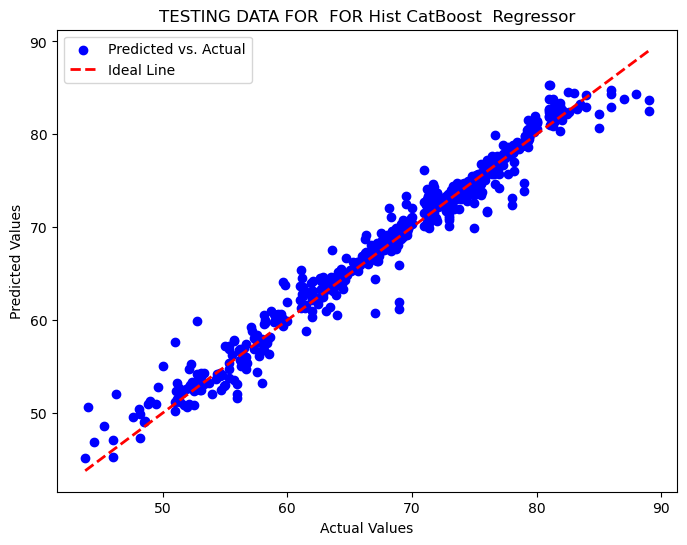

In [276]:
y_pred = model.predict(x_test)
score=model.score(x_test,y_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist CatBoost  Regressor")
plt.legend()
score

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3524
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 21
[LightGBM] [Info] Start training from score 69.283825
Training until validation scores don't improve for 10 rounds
[10]	valid_0's rmse: 5.8555
[20]	valid_0's rmse: 3.89466
[30]	valid_0's rmse: 2.83368
[40]	valid_0's rmse: 2.30455
[50]	valid_0's rmse: 2.01728
[60]	valid_0's rmse: 1.88004
[70]	valid_0's rmse: 1.81833
[80]	valid_0's rmse: 1.78915
[90]	valid_0's rmse: 1.76147
[100]	valid_0's rmse: 1.73921
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.73921
RMSE: 1.7392123849841619
R-squared: 0.9650917977676042


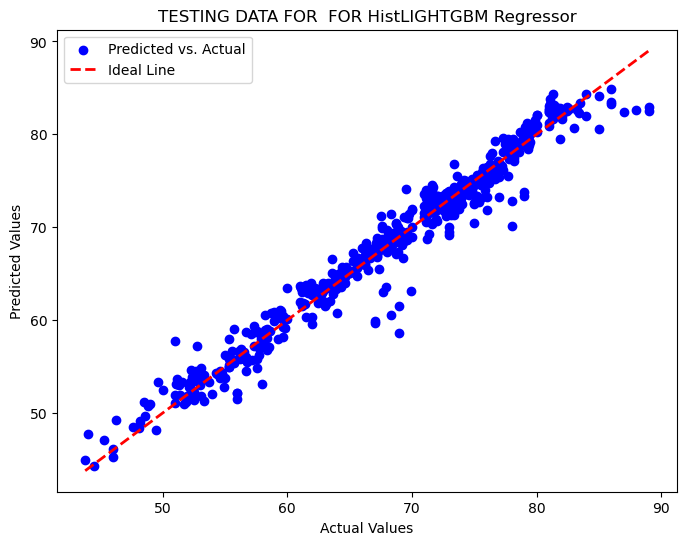

In [277]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

num_round = 100  # Number of boosting rounds

model = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10, verbose_eval=10)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR HistLIGHTGBM Regressor")
plt.legend()